In [1]:
import numpy as np
import pandas as pd
# %matplotlib widget
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
import os
import math as m

In [52]:
def plot(data: dict):
    fig = plt.figure(figsize=(10, 10)).gca(projection="3d")
#     ax = Axes3D(fig)
    
    fig.scatter(data["x"], data["y"], data["z"], color="grey")
    fig.set_title("3D plot")
    fig.set_xlabel('x-axis')
    fig.set_ylabel('y-axis')
    fig.set_zlabel('z-axis')
    plt.show()

In [53]:
data_dir = "data/"

gps_file = "export_dgps_event2.txt"
gps = np.loadtxt(gps_file, skiprows=1)

data = list()

for filename in os.listdir(data_dir):
    file = os.path.join(data_dir, filename)
    data.append(np.loadtxt(file))

In [40]:
for i in range(len(data)):
    data[i][:, 0] = data[i][:, 0] + (i * 538)

In [42]:
for i in range(len(data)):
    print(data[i][:, 0][-1])

537.0
1075.0
1613.0
2151.0
2689.0
3227.0
3765.0
4303.0
4841.0
5379.0


In [43]:
merged = data[0]

In [47]:
for file_input in data[1:]:
    merged = np.concatenate((merged, file_input))

In [8]:
df_global = pd.DataFrame(merged)

In [9]:
df_global[[0, 1]] = df_global[[0, 1]].astype(int)

In [10]:
df_global = df_global.sort_values([1, 0], ascending=(True, True))

In [11]:
df_global

,0,1,2,3,4,5,6,7
5940,12,0,3.2141,0.6925,66.8928,255.0,255.0,255.0
6437,13,0,3.5502,0.6937,66.8767,255.0,255.0,255.0
6934,14,0,3.8862,0.6949,66.8576,255.0,255.0,255.0
7431,15,0,4.2221,0.6961,66.8369,255.0,255.0,255.0
7928,16,0,4.5580,0.6972,66.8164,255.0,255.0,255.0
...,...,...,...,...,...,...,...,...
1979640,5375,499,-0.1016,-0.0029,-0.2144,114.0,114.0,114.0
1980136,5376,499,-0.1022,-0.0030,-0.2184,86.0,86.0,86.0
1980586,5377,499,-0.1046,-0.0031,-0.2265,112.0,112.0,112.0
1981046,5378,499,-0.1072,-0.0032,-0.2353,192.0,192.0,192.0


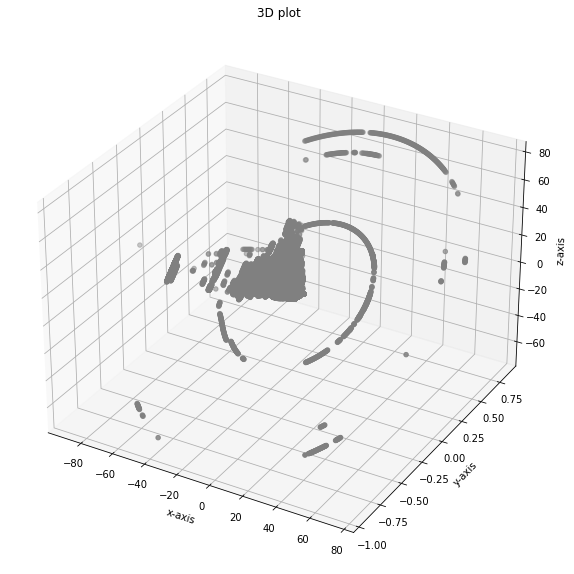

In [35]:
plot(data={
    "x": df_global[2],
    "y": df_global[3],
    "z": df_global[4],
})

In [17]:
test = df_global[[1, 2, 3, 4]].to_numpy()
bras_levier = np.array([0.14, 0.249, -0.076])
rotation_matrix = np.array([[0, -1, 0], [1, 0, 0], [0, 0, 1]])

In [19]:
rotation_matrix.shape

(3, 3)

In [20]:
test.shape

(1981443, 4)

In [21]:
rotation_matrix.shape

(3, 3)

In [22]:
result = np.empty((test.shape[0], 4))
for i in range(test.shape[0]):
    result[i] = np.array([test[i][0], *(rotation_matrix.dot(test[i][1:]) + bras_levier)])

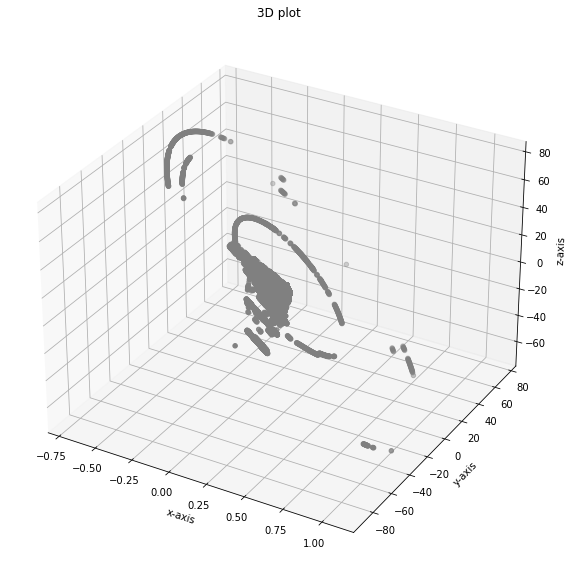

In [36]:
plot(data={
    "x": result[:,1],
    "y": result[:,2],
    "z": result[:,3],
})

In [24]:
def gps_rotation_matrix(heading, pitch, roll):
    Rheading = np.array([
        [m.cos(heading), -m.sin(heading), 0],
        [m.sin(heading), m.cos(heading), 0],
        [0, 0, 1]
    ])
    
    Rpitch = np.array([
        [m.cos(pitch), 0, m.sin(pitch)],
        [0, 1, 0],
        [-m.sin(pitch), 0, m.cos(pitch)],
    ])
    
    Rroll = np.array([
        [1, 0, 0],
        [0, m.cos(roll), -m.sin(roll)],
        [0, m.sin(roll), m.cos(roll)],
    ])

    return Rheading * Rpitch * Rroll

In [25]:
gps_rotation_matrix(0.586, 22.061215, 0.495261).dot(result[0][1:]) + np.array([408805.808657, 5381737.416481, 190.215839])

array([4.08806268e+05, 5.38173996e+06, 1.31571678e+02])

In [26]:
result.shape

(1981443, 4)

In [27]:
print(np.where(result[:,0] == 499))

(array([1978949, 1978950, 1978951, ..., 1981440, 1981441, 1981442]),)


In [28]:
result[result[:,0] == 0, :]

array([[ 0.    , -0.5525,  3.4631, 66.8168],
       [ 0.    , -0.5537,  3.7992, 66.8007],
       [ 0.    , -0.5549,  4.1352, 66.7816],
       ...,
       [ 0.    ,  0.1417,  0.3481, -0.2552],
       [ 0.    ,  0.1416,  0.3348, -0.2428],
       [ 0.    ,  0.1417,  0.3377, -0.2505]])

In [29]:
gps[:,1:4]

array([[4.08805809e+05, 5.38173742e+06, 1.90215839e+02],
       [4.08805821e+05, 5.38173745e+06, 1.90215981e+02],
       [4.08805833e+05, 5.38173748e+06, 1.90216144e+02],
       ...,
       [4.08803459e+05, 5.38173612e+06, 1.90233266e+02],
       [4.08803476e+05, 5.38173611e+06, 1.90233453e+02],
       [4.08803938e+05, 5.38173594e+06, 1.90232538e+02]])

In [30]:
gps_result = np.empty((result.shape[0], 4))
counter = 0

for i in range(500):
    angles = np.array(gps[i, 7:10])
    gps_coordinates = np.array(gps[i, 1:4])
    rotation_matrix = gps_rotation_matrix(heading=angles[2], pitch=angles[1], roll=angles[0])
    
    results_by_profile = result[result[:,0] == i, :][:,1:]
    
    for j in range(results_by_profile.shape[0]):
        gps_result[counter] = np.array([0, *(results_by_profile[j].dot(rotation_matrix) + gps_coordinates)])
        counter += 1    

In [31]:
gps_result[0]

array([0.00000000e+00, 4.08806294e+05, 5.38173427e+06, 2.43697246e+02])

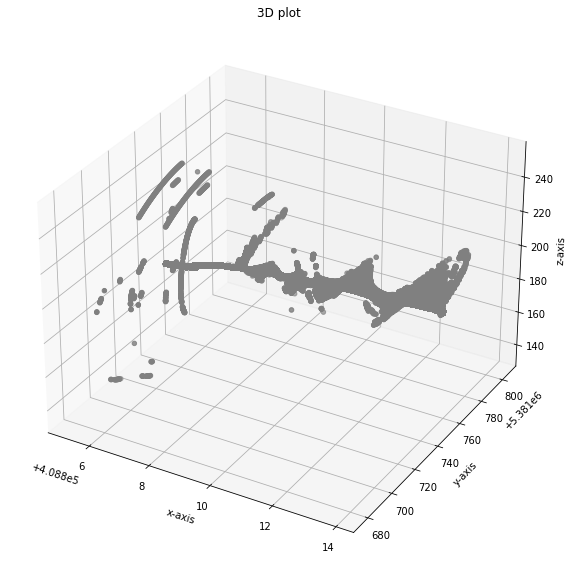

In [34]:
plot(data={
    "x": gps_result[:,1],
    "y": gps_result[:,2],
    "z": gps_result[:,3],
})